# Реалізація алгоритиму LZ77 

In [14]:
import matplotlib.pyplot as plt
from datetime import datetime
import sys

In [15]:
class LZ77:
    """
    LZ77 class
    """
    def __init__(self, buffer_size):
        """
        Constructor
        """
        self.buffer_size = buffer_size

    def find_longest_match(self, text, current_pos, max_length):
        """
        Finds longest match
        """
        buffer_start = max(0, current_pos - self.buffer_size)
        buffer = text[buffer_start:current_pos]
        best_offset, best_length = 0, 0
        for offset in range(1, min(current_pos, self.buffer_size) + 1):
            pattern = text[current_pos:current_pos + offset]
            match_pos = buffer.rfind(pattern)
            if match_pos == -1:
                break
            match_length = offset
            while (current_pos + match_length < len(text) and
                   match_length < max_length and
                   text[buffer_start + match_pos + match_length]\
                     == text[current_pos + match_length]):
                match_length += 1
            if match_length > best_length:
                best_offset, best_length = current_pos - buffer_start - match_pos, match_length
                if best_length == max_length:
                    break
        if current_pos + best_length >= len(text):
            best_length = len(text) - current_pos
        return best_offset, best_length

    def encode(self, text):
        """
        Encode input string
        """
        result, pos = [], 0
        while pos < len(text):
            offset, length = self.find_longest_match(text, pos, self.buffer_size)
            next_char = text[pos + length] if pos + length < len(text) else ''
            result.append((offset, length, next_char))
            pos += length + 1
        return result

    def decode(self, encoded) -> str:
        """
        This methode decode encoding into string.
        """
        decoded = ''
        for item in encoded:
            if item[1] != 0:
                start_index = len(decoded) - item[0]
                for i in range(item[1]):
                    decoded += decoded[start_index+i]
                decoded += item[2]
            else:
                decoded += item[2]
        return decoded



## Час роботи, розмір файлу до і після стиску на файлах різних розмірів і з різними розмірами буфера


In [21]:
def check_lz77_encode():
    buf_sizes = [500,1000,10000] 
    data_file = ["test1.txt", "test2.txt", "test3.txt"]
    for i in data_file:
        with open(i, "r", encoding="UTF-8") as data:
            test_data = str([i.strip() for i in data.readlines()])
        print([len(test_data)])
        for bs in buf_sizes:
            start_time = datetime.now()
            encoded = LZ77(bs).encode(text=test_data)
            end_time = datetime.now()
            print('algorithm work time: {}'.format(end_time - start_time))
            print(f"text size encoded file: {sys.getsizeof(encoded)/1000000} mb, bufer{bs}")
            print(f"text size start file with length : {sys.getsizeof(test_data)/1000000} mb, bufer{bs}")
            print(f'на скільки повідомлення закодоване: {100 - ((100 * (len(LZ77(1000).encode(text=test_data))))/((len(test_data))))} %\n')
check_lz77_encode()

[2208]
algorithm work time: 0:00:00.003556
text size encoded file: 0.000184 mb, bufer500
text size start file with length : 0.002257 mb, bufer500
на скільки повідомлення закодоване: 99.54710144927536 %

algorithm work time: 0:00:00.001798
text size encoded file: 0.000184 mb, bufer1000
text size start file with length : 0.002257 mb, bufer1000
на скільки повідомлення закодоване: 99.54710144927536 %

algorithm work time: 0:00:00.081703
text size encoded file: 0.00012 mb, bufer10000
text size start file with length : 0.002257 mb, bufer10000
на скільки повідомлення закодоване: 99.54710144927536 %

[520200]
algorithm work time: 0:00:08.740247
text size encoded file: 0.018232 mb, bufer500
text size start file with length : 0.520249 mb, bufer500
на скільки повідомлення закодоване: 99.6526336024606 %

algorithm work time: 0:00:09.644868
text size encoded file: 0.016184 mb, bufer1000
text size start file with length : 0.520249 mb, bufer1000
на скільки повідомлення закодоване: 99.6526336024606 %


## Наступний код виводить час роботи, розмір файлу до і після стиску на файлі розміром 7489724 елементів з буфером розміром 1000


In [18]:
data_file = "test.txt"
with open(data_file, "r", encoding="UTF-8") as data:
    test_data = str([i.strip() for i in data.readlines()])
print(f"length of file: {len(test_data)}")
start_time = datetime.now()
encoded = LZ77(1000).encode(text=test_data)
end_time = datetime.now()
print('algorithm work time: {}'.format(end_time - start_time))
print(f"text size encoded file: {sys.getsizeof(encoded)/1000000} mb, bufer{1000}")
print(f"text size start file with length : {sys.getsizeof(test_data)/1000000} mb, bufer{1000}\n")
print(f'на скільки повідомлення закодоване: {100 - ((100 * (len(LZ77(1000).encode(text=test_data))))/((len(test_data))))} %')

length of file: 14979448
algorithm work time: 0:00:03.292662
text size encoded file: 0.136632 mb, bufer1000
text size start file with length : 14.979497 mb, bufer1000

на скільки повідомлення закодоване: 99.8985476634386 %


## Побудова графіків для файлів різного розміру з буферами різного розміру

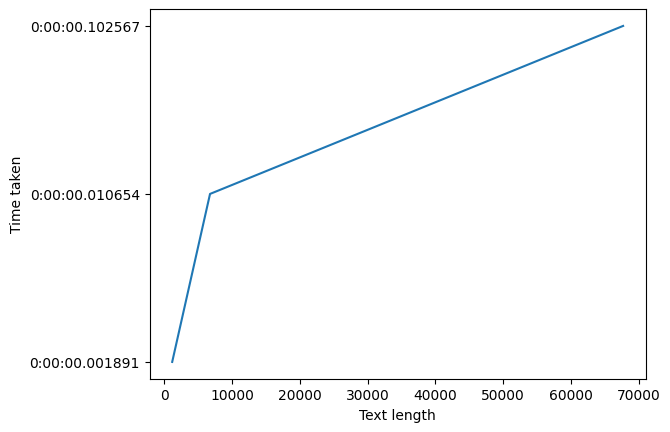

In [13]:
def test_lz77(buffer_size):
    files = ["test1.txt", "test2.txt", "test3.txt"]
    time_taken = []
    length = []
    for file_path in files:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = file.read()
        length.append(len(data))
        start = datetime.now()
        lz77 = LZ77(buffer_size)
        lz77.encode(data)
        end = datetime.now()
        time_taken.append(str(end - start))
    plt.xlabel('Text length')
    plt.ylabel('Time taken')
    x = length
    y = time_taken
    plt.plot(x, y)
test_lz77(100)

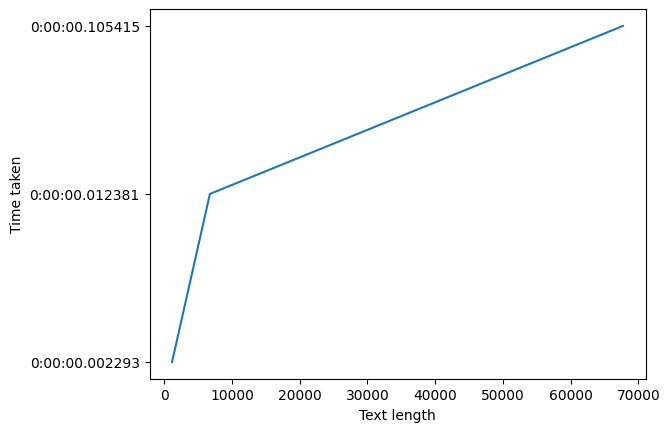

In [16]:
test_lz77(500)

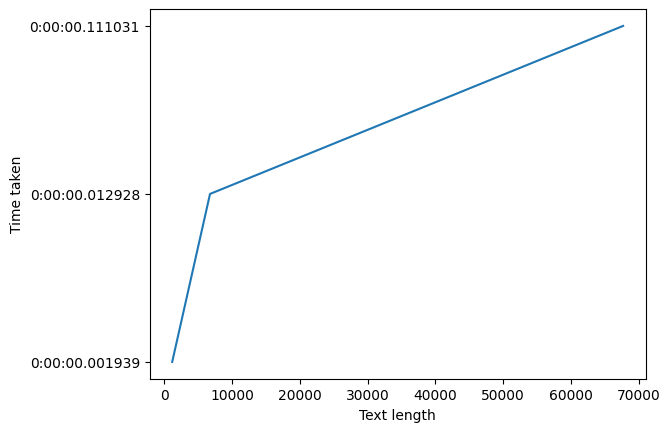

In [17]:
test_lz77(800)